## Gradient Descent cho hàm nhiều biến
Ở đây ta sẽ load data từ file csv, [link file csv](https://drive.google.com/file/d/1YIZFSSh1cfYs2_7pnf7Cl0lJWFSMMb2o/view?usp=sharing)

Ta nhận thấy hàm f(x) sẽ có dạng như sau 
 + x, y đã biết
 + w = model parameter, là hệ số cần đi tìm minimum
 
Lost function của nó sẽ có dạng 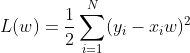

Hay ta có thể thấy nó là một norm-2, ghi lại được công thức như sau 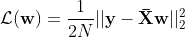

Mn có thể tham khảo đạo hàm cho hàm nhiều biến ở [link](https://machinelearningcoban.com/math/#-dao-ham-cua-ham-nhieu-bien). Vậy đạo hàm của loss function trên sẽ là 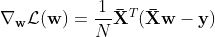

Ta tiến hành demo code bằng Python

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

Solution found by Gradient Descent: w = [[0.0326746  1.48099828]]


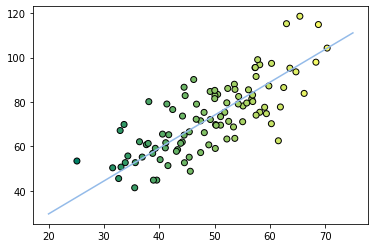

In [2]:
# load data từ file csv
df = pd.read_csv('../data/data_01.csv')
X = np.array([df.iloc[:, 0]]).T
y = np.array([df.iloc[:, 1]]).T

# chuẩn bị dữ liệu
one = np.ones((X.shape[0],1))
Xbar = np.concatenate((one, X), axis = 1)

def grad(w):
    N = Xbar.shape[0]
    return 1/N * Xbar.T.dot(Xbar.dot(w) - y)

def myGD(w_init, grad, eta):
    w = [w_init]
    for it in range(100):
        w_new = w[-1] - eta*grad(w[-1])
        if np.linalg.norm(grad(w_new), 2)/len(w_new) < 1e-6:
            break 
        w.append(w_new)
    return (w, it) 

(w_optimal, it1) = myGD(np.array([[0], [0]]), grad, 0.0001)
w = w_optimal[-1]

plt.scatter(X, y, c=X, cmap='summer', edgecolors='black')
x_1 = np.linspace(20, 75, 3, endpoint = True)
y = w[0, 0] + w[1, 0]*x_1 
plt.plot(x_1, y, color='#94bbe9')

print(f'Solution found by Gradient Descent: w = {w.T}')

Tùy theo cách tối ưu hóa model parameter mà ta lựa chọn, mà kết quả **w** có thể ra khác nhau. Có thể thấy ở ví dụ sử dụng Normal Equation để giải quyết sẽ ra **w** khác với sử dụng Gradient Descent. Nhưng chung quy lại khi thế **x** vào để predict thì kết quả có thể xấp xỉ nhau, từ đó dẫn tới vấn đề lựa chọn model nào tốt hơn model nào